## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

enrollments = 'enrollments.csv'

with open(enrollments, 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.


import unicodecsv as csv

## Put the correct file location on your device.

enrollments = 'enrollments.csv'
daily_engagement = 'daily_engagement.csv'
project_submissions = 'project_submissions.csv'


def read_csv(csvfile):
    with open(csvfile, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

enrollments = read_csv(enrollments)
daily_engagement = read_csv(daily_engagement)
project_submissions = read_csv(project_submissions)

print(enrollments[0])
print('--------------')
print(daily_engagement[0])
print('-------------------')
print(project_submissions[0])

{'account_key': '448', 'status': 'canceled', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'days_to_cancel': '65', 'is_udacity': 'True', 'is_canceled': 'True'}
--------------
{'acct': '0', 'utc_date': '2015-01-09', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'lessons_completed': '0.0', 'projects_completed': '0.0'}
-------------------
{'creation_date': '2015-01-14', 'completion_date': '2015-01-16', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{'account_key': '448',
 'status': 'canceled',
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_udacity': True,
 'is_canceled': True}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{'acct': '0',
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0),
 'num_courses_visited': 1,
 'total_minutes_visited': 11.6793745,
 'lessons_completed': 0,
 'projects_completed': 0}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 'assigned_rating': 'UNGRADED',
 'account_key': '256',
 'lesson_key': '3176718735',
 'processing_state': 'EVALUATED'}

## Investigating the Data

In [10]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

# run code at Problems in the Data before this
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])

    return unique_students

print(len(enrollments))
print(len(daily_engagement))
print(len(project_submissions))
print('----------')
print(len(get_unique_students(enrollments)))
print(len(get_unique_students(daily_engagement)))
print(len(get_unique_students(project_submissions)))


1640
136240
3642
----------
1302
1237
743


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    try:
        engagement_record['account_key'] = engagement_record['acct']
        del[engagement_record['acct']]
    except KeyError:
        pass
    
print(daily_engagement[0]['account_key'])
    

0


In [8]:
#A function to get the excellent student بدل الطريقة الي فوق اني اجيب للكل جدول لواحده فعمل داله بعد ما كل جداول بقت فيها account_key 
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

In [9]:
# Total number of rows and the number of unique students (account keys)
# in each table.

print('Total enrollment records:')
print(len(enrollments))

unique_enrolled_students = get_unique_students(enrollments)
print('Total unique enrollment records:')
print(len(unique_enrolled_students))

print('Total daily engagement records:')
print(len(daily_engagement))

unique_engagement_students = set()
unique_engagement_students = get_unique_students(daily_engagement)
print('Total unique daily engagement records:')
print(len(unique_engagement_students))

print('Total project submission records:')
print(len(project_submissions))

unique_project_submitters = get_unique_students(project_submissions)
print('Total unique project submission records:')
print(len(unique_project_submitters))

Total enrollment records:
1640
Total unique enrollment records:
1302
Total daily engagement records:
136240
Total unique daily engagement records:
1237
Total project submission records:
3642
Total unique project submission records:
743


## Missing Engagement Records

In [11]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.

students = set()

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        students.add(student)
        
len(students)  # 1302-1237 = 65

65

In [12]:
# print missing student

for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print(enrollment)
        break #لو عايز اطبع طالب واحد هحط بريك هنا

{'account_key': '1219', 'status': 'canceled', 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), 'days_to_cancel': 0, 'is_udacity': False, 'is_canceled': True}


## Checking for More Problem Records

In [13]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1
        print(enrollment)
        
num_problem_students

{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'days_to_cancel': 59, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1304', 'status': 'canceled', 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'days_to_cancel': 99, 'is_udacity': True, 'is_canceled': True}
{'account_key': '1101', 'status': 'current', 'join_date': datetime.datetime(2015, 2, 25, 0, 0), 'cancel_date': None, 'days_to_cancel': None, 'is_udacity': True, 'is_canceled': False}


3

## Tracking Down the Remaining Problems

In [14]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
len(udacity_test_accounts)

6

In [15]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [16]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


## Refining the Question

In [17]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for at least 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']

        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date

len(paid_students)

995

## Getting Data from First Week

In [18]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

In [19]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#هعمل دالة للطلاب الي لغوا خلال تجربة مجانيه
def remove_free_trail_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
            
    return new_data

In [20]:
paid_enrollments = remove_free_trail_cancels(enrollments)
paid_engagement = remove_free_trail_cancels(daily_engagement)
paid_submissions = remove_free_trail_cancels(project_submissions)

print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))



1293
134549
3618


In [21]:
paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)
    

6919

## Exploring Student Engagement

In [22]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [23]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [24]:
import numpy as np

total_minutes = list(total_minutes_by_account.values())
print ('Mean:', np.mean(total_minutes))
print ('Standard Deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))

Mean: 306.70832675342825
Standard Deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997


## Debugging Data Analysis Code

In [25]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

max_minutes


3564.7332644989997

In [26]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print(engagement_record)

{'utc_date': datetime.datetime(2015, 7, 9, 0, 0), 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'lessons_completed': 4, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 10, 0, 0), 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 11, 0, 0), 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'lessons_completed': 6, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 12, 0, 0), 'num_courses_visited': 1, 'total_minutes_visited': 294.568774, 'lessons_completed': 2, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 13, 0, 0), 'num_courses_visited': 3, 'total_minutes_visited': 471.2139785, 'lessons_completed': 1, 'projects_completed': 0, 'account_key': '163'}
{'utc_date': datetime.datetime(2015, 7, 14, 0, 0), 'num_courses_vi

## Lessons Completed in First Week

In [27]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')


In [28]:
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += data_point[field_name]
        summed_data[key] = total
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')

In [29]:
def describe_data(data):
    
    print('Mean:', np.mean(data))
    print('Standard deviation:', np.std(data))
    print('Minimum:', np.min(data))
    print('Maximum:', np.max(data))

print('Total minutes by account:')
describe_data(np.array(list(total_minutes_by_account.values())))

print('-------------------------------------------')

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')

print('Lessons completed by account:')
describe_data(np.array(list(lessons_completed_by_account.values())))

Total minutes by account:
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997
-------------------------------------------
Lessons completed by account:
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [30]:
######################################
#                 10                 #
######################################

# Finds the mean, standard deviation, minimum, and maximum for the number of
# days each student visits the classroom during the first week

engagement_by_account = group_data(paid_engagement_in_first_week,'account_key')

for account_key, engagement_for_student in engagement_by_account.items():
    for data_points in engagement_for_student:
        if data_points['num_courses_visited'] > 0:
            data_points['has_visited'] = 1
        else:
            data_points['has_visited'] = 0

days_visited_by_account  = sum_grouped_items(engagement_by_account, 'has_visited')

print('Students that visited in first week:')
describe_data(np.array(list(days_visited_by_account .values())))

Students that visited in first week:
Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [31]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']    

    if ((project in subway_project_lesson_keys) and
            (rating == 'PASSED' or rating == 'DISTINCTION')):
        pass_subway_project.add(submission['account_key'])

len(pass_subway_project)

passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print('Passing engagement:' , len(passing_engagement))
print('Non passing engagement', len(non_passing_engagement))

Passing engagement: 4527
Non passing engagement 2392


## Comparing the Two Student Groups

In [32]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

# Computes some metrics that are interesting and see how they differ for
# students who pass the subway project vs. students who don't

passing_engagement_by_account = group_data(passing_engagement,'account_key')

non_passing_engagement_by_account = group_data(non_passing_engagement,'account_key')

print('non-passing students:')
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')
describe_data(np.array(list(non_passing_minutes.values())))
print('-------------------------------------------')
print('passing students:')
passing_minutes = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
describe_data(np.array(list(passing_minutes.values())))
print('-------------------------------------------')
print('non-passing students:')
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(np.array(list(non_passing_lessons.values())))
print('-------------------------------------------')
print('passing students:')
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(np.array(list(passing_lessons.values())))
print('-------------------------------------------')
print('non-passing students:')
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account, 'has_visited')
describe_data(np.array(list(non_passing_visits.values())))
print('-------------------------------------------')
print('passing students:')
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(np.array(list(passing_visits.values())))

non-passing students:
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
-------------------------------------------
passing students:
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
-------------------------------------------
non-passing students:
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
-------------------------------------------
passing students:
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
-------------------------------------------
non-passing students:
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
-------------------------------------------
passing students:
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7


## Making Histograms

In [33]:
pip install seaborn

Populating the interactive namespace from numpy and matplotlib


C:\Users\AHMEDSobhy\anaconda3\envs\tea_facts\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Text(0.5, 0, 'Days Visited')

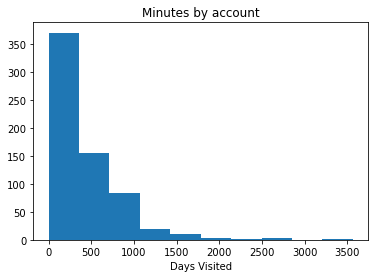

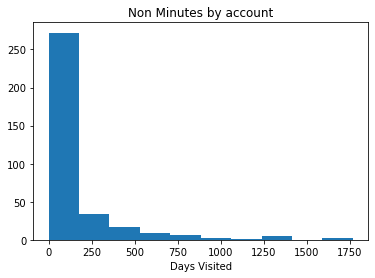

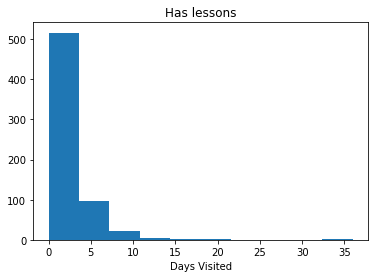

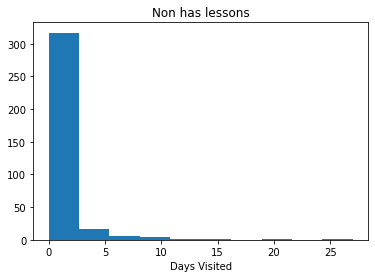

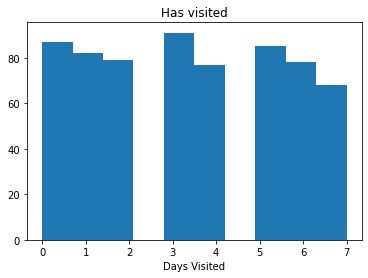

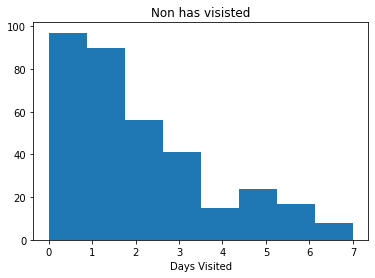

In [34]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%pylab inline

# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns

has_minutes_by_account = sum_grouped_items(passing_engagement_by_account,'total_minutes_visited')
non_has_minutes_by_account = sum_grouped_items(non_passing_engagement_by_account,'total_minutes_visited')

has_lessons_by_account = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
non_has_lessons_by_account = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')

has_visited_by_account = sum_grouped_items(passing_engagement_by_account,'has_visited')
non_has_visited_by_account = sum_grouped_items(non_passing_engagement_by_account,'has_visited')

has_mins = []
for account_key, records in has_minutes_by_account.items():
    has_mins.append(records)

plt.figure(1)
plt.hist(has_mins)
plt.title("Minutes by account")
plt.xlabel("Days Visited")

non_has_mins = []
for account_key, records in non_has_minutes_by_account.items():
    non_has_mins.append(records)

plt.figure(2)
plt.hist(non_has_mins)
plt.title("Non Minutes by account")
plt.xlabel("Days Visited")

has_lessons = []
for account_key, records in has_lessons_by_account.items():
    has_lessons.append(records)

plt.figure(3)
plt.hist(has_lessons)
plt.title('Has lessons')
plt.xlabel("Days Visited")

non_has_lessons = []
for account_key, records in non_has_lessons_by_account.items():
    non_has_lessons.append(records)

plt.figure(4)
plt.hist(non_has_lessons)
plt.title('Non has lessons')
plt.xlabel("Days Visited")

has_visited = []
for account_key, records in has_visited_by_account.items():
    has_visited.append(records)

plt.figure(5)
plt.hist(has_visited)
plt.title('Has visited')
plt.xlabel("Days Visited")

non_has_visited = []
for account_key, records in non_has_visited_by_account.items():
    non_has_visited.append(records)

plt.figure(6)
plt.hist(non_has_visited, bins = 8)
plt.title('Non has visisted')
plt.xlabel("Days Visited")

## Improving Plots and Sharing Findings

Text(0.5, 1.0, 'Distribution of classroom visits in the first week for students who pass the subway project')

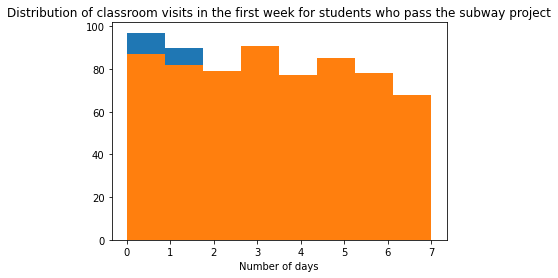

In [35]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

plt.hist(non_passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')

plt.hist(passing_visits.values(), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')